In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

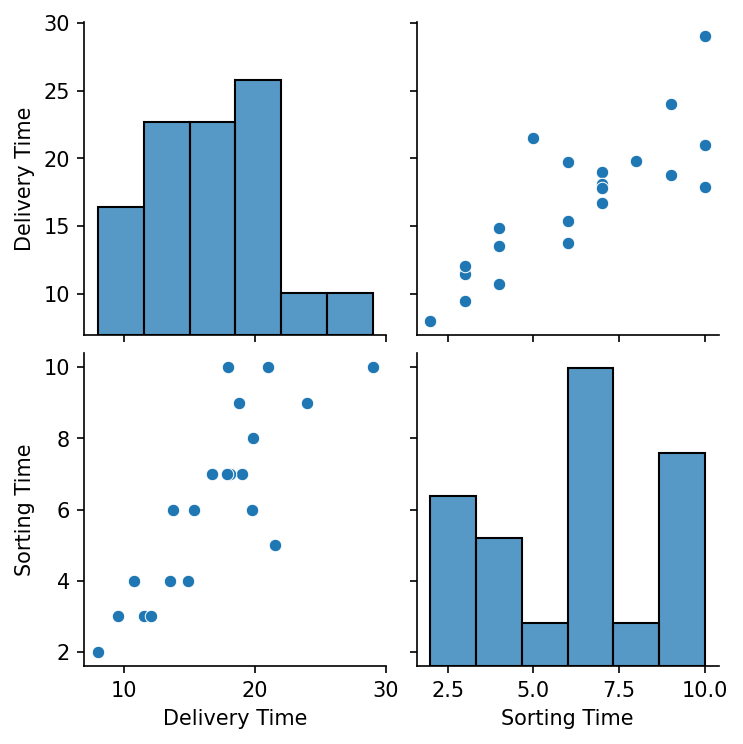

In [5]:
sns.pairplot(df)

<Axes: >

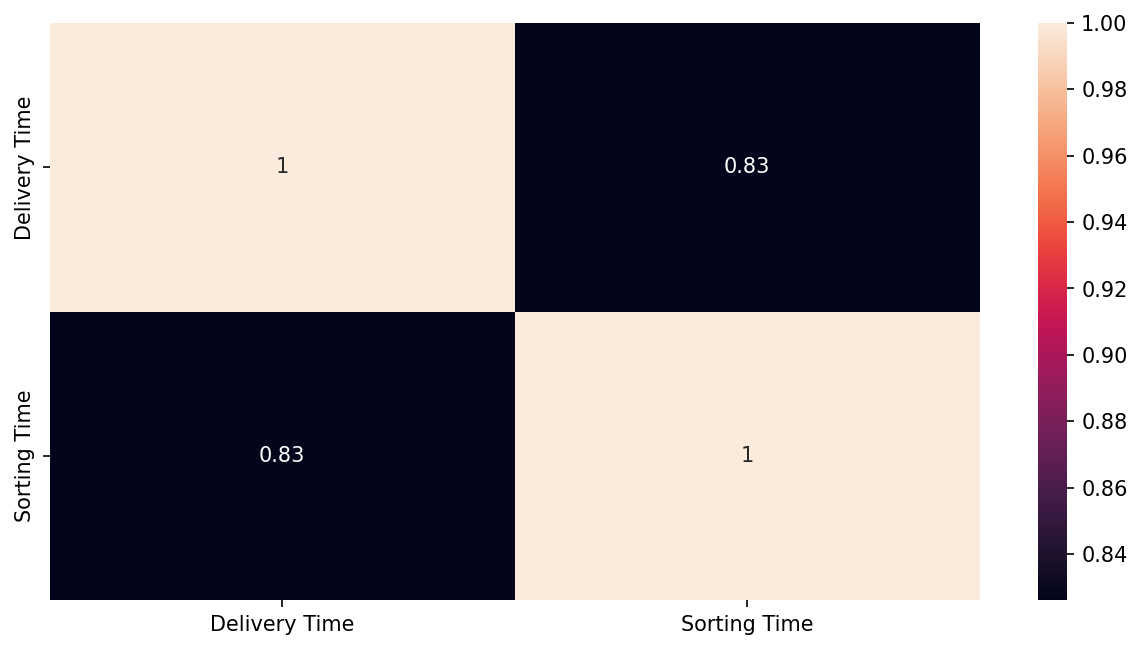

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
import statsmodels.formula.api as smf

In [8]:
df.rename(columns={"Delivery Time":"Delivery_time",
                  "Sorting Time":"Sorting_time"},inplace=True)

In [9]:
model = smf.ols('Delivery_time~Sorting_time',data=df).fit()
model

In [10]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

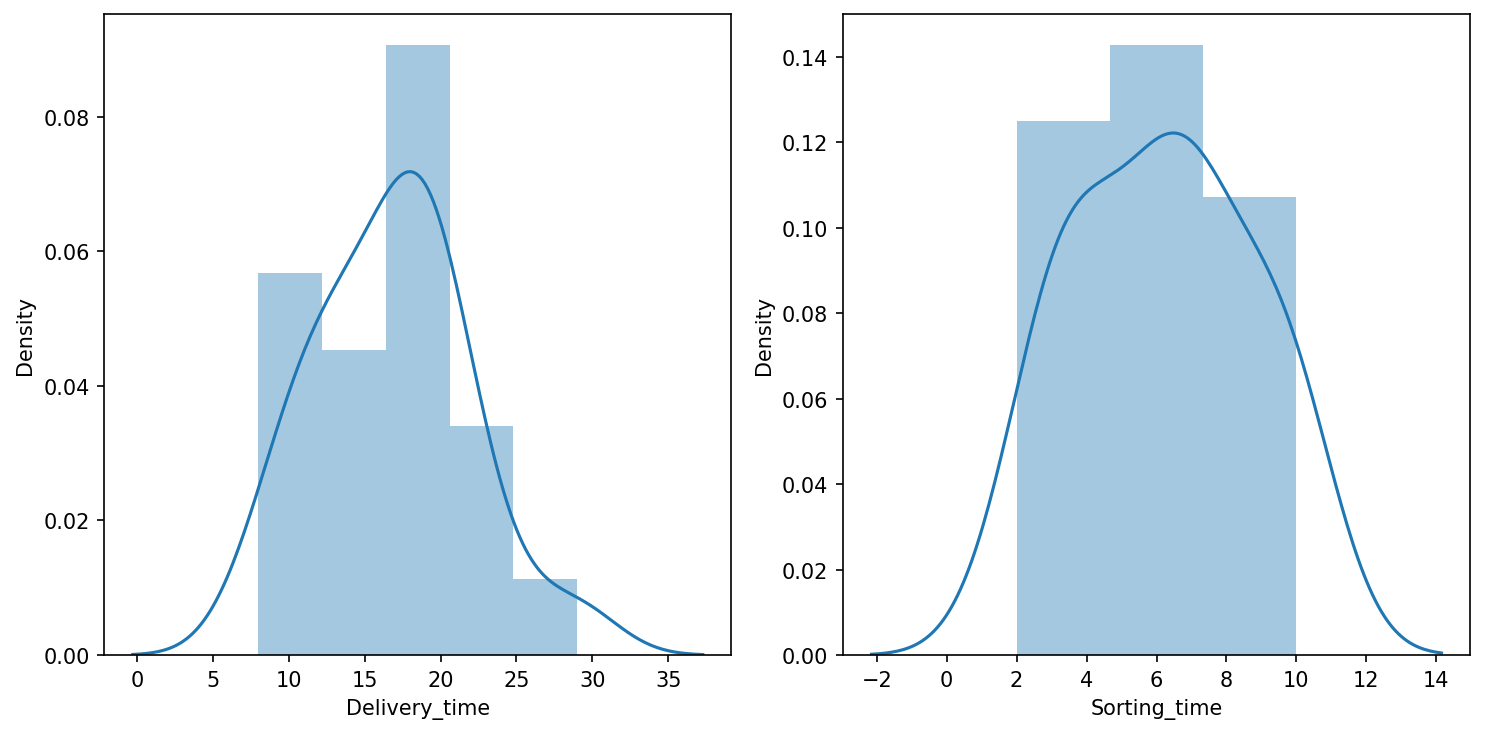

In [11]:
plt.subplot(1,2,1)
sns.distplot(df['Delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['Sorting_time'])

plt.tight_layout()

- Log Transformation

In [12]:
df['log_Delivery_time'] = np.log(df['Delivery_time'])
df['log_Sorting_time'] = np.log(df['Sorting_time'])

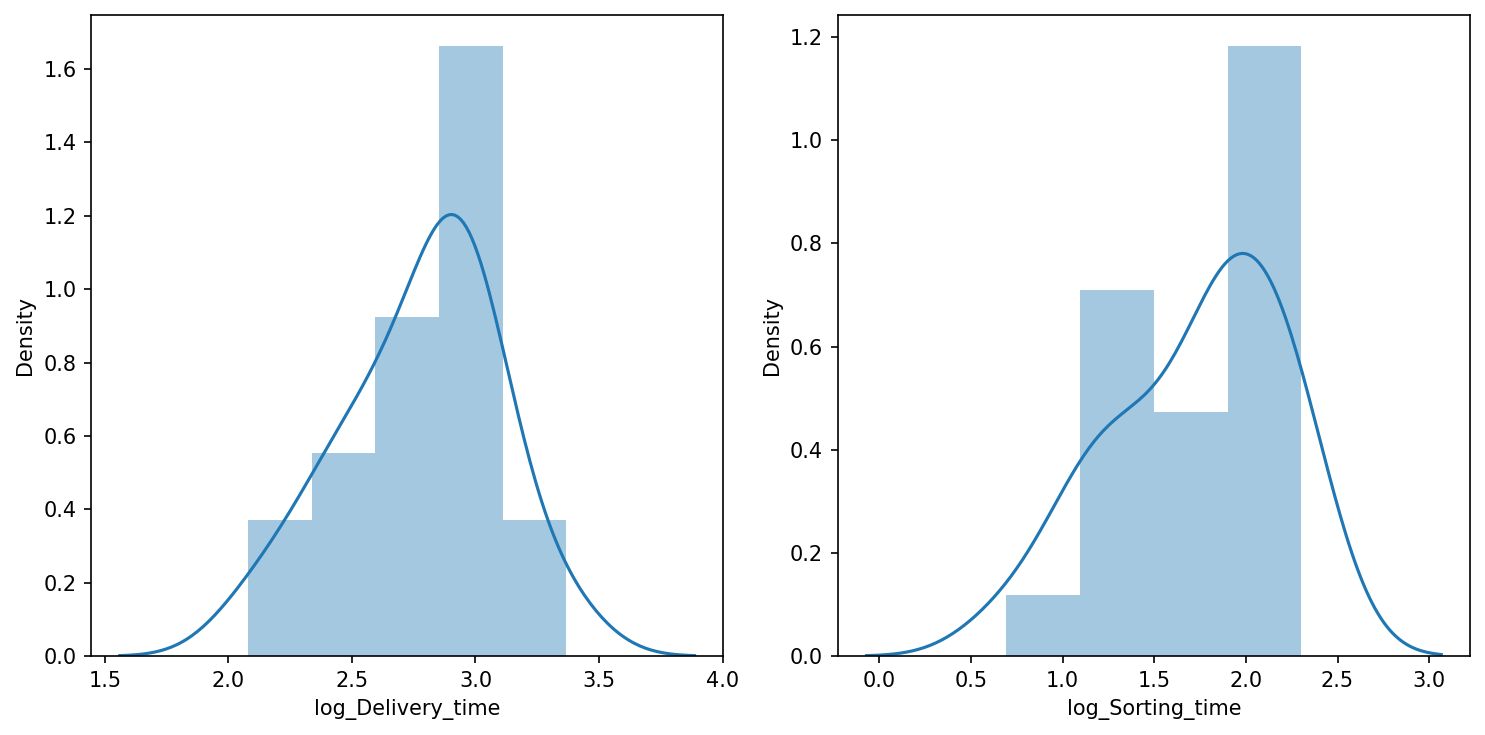

In [13]:
plt.subplot(1,2,1)
sns.distplot(df['log_Delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['log_Sorting_time'])

plt.tight_layout()

In [14]:
df["log_delivery_time"] = np.log(df["Delivery_time"])
df["log_sorting_time"] = np.log(df["Sorting_time"])

In [15]:
log_model = smf.ols('log_delivery_time~log_sorting_time',data=df).fit()
log_model

In [16]:
log_model.params

Intercept           1.741987
log_sorting_time    0.597522
dtype: float64

In [17]:
log_model.rsquared, log_model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

- sqrt transformation

In [18]:
df["sqrt_delivery_time"] = np.sqrt(df["Delivery_time"])
df["sqrt_sorting_time"] = np.sqrt(df["Sorting_time"])



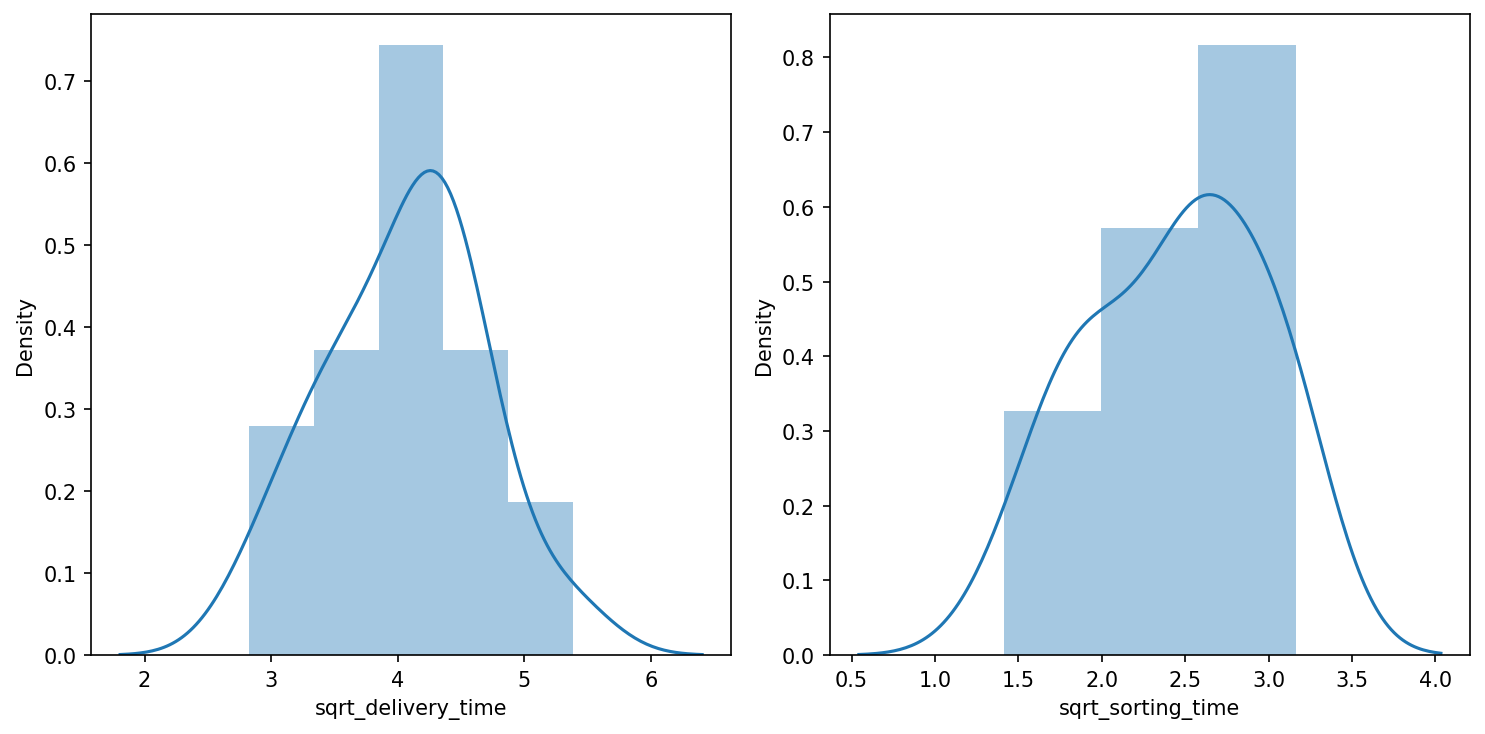

In [19]:
plt.subplot(1,2,1)
sns.distplot(df["sqrt_delivery_time"])

plt.subplot(1,2,2)
sns.distplot(df["sqrt_sorting_time"])

plt.tight_layout()

In [20]:
sqrt_model = smf.ols("sqrt_delivery_time~sqrt_sorting_time", data=df).fit()
sqrt_model.params

Intercept            1.613479
sqrt_sorting_time    1.002217
dtype: float64

In [21]:
sqrt_model.rsquared, sqrt_model.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
x = np.array(df["Sorting_time"]).reshape((-1,1))
y = df["Delivery_time"]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [25]:
lr_model.coef_, lr_model.intercept_

(array([1.52971053]), 7.176184210526316)

In [26]:
y_hat = lr_model.predict(x_test)
y_hat

array([13.29502632, 19.41386842, 20.94357895, 10.23560526, 17.88415789])

In [27]:
mse = mean_squared_error(y_test,y_hat)
mse

3.4151904541551223

In [28]:
r2_score(y_test,y_hat)

0.881193344590806

# Salary Dataset

In [29]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [30]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [31]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

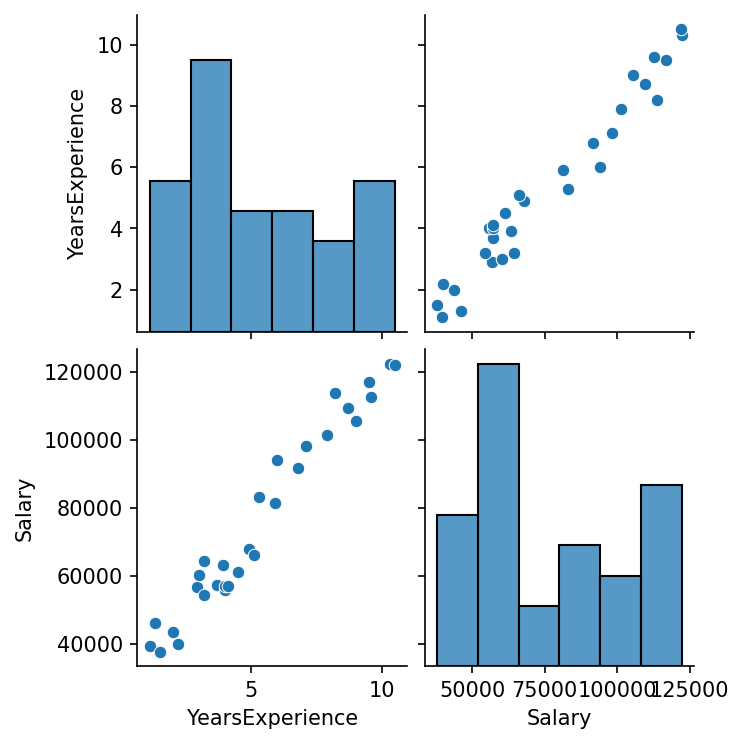

In [32]:
sns.pairplot(df)

<Axes: >

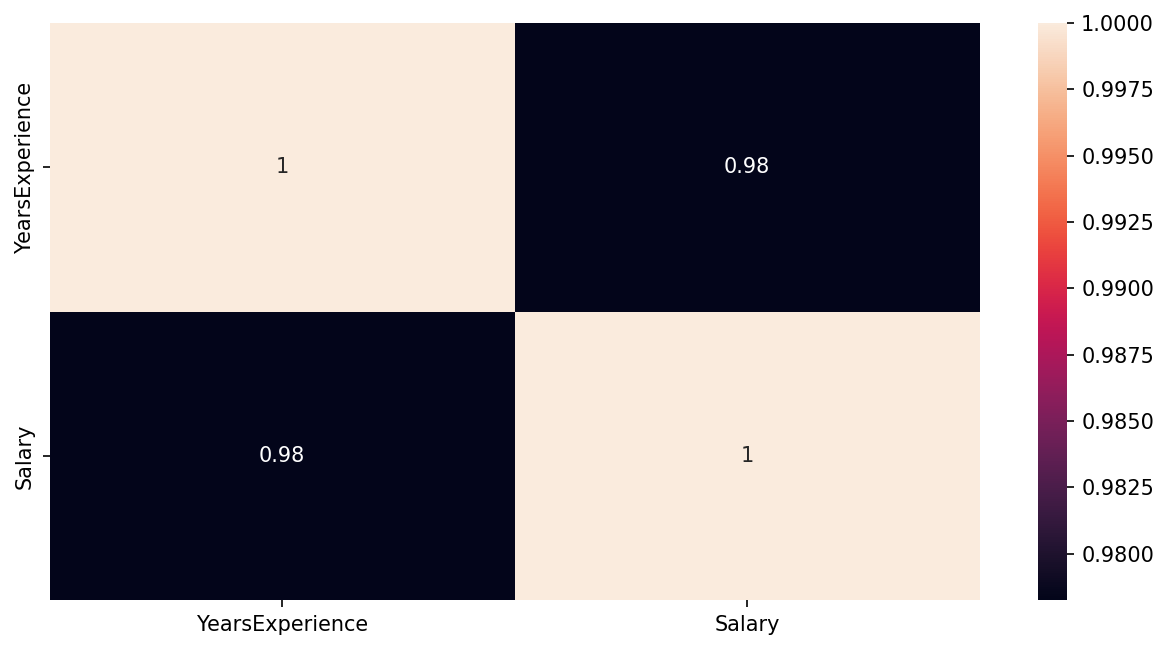

In [33]:
sns.heatmap(df.corr(),annot=True)

In [34]:
model = smf.ols('Salary~YearsExperience',data = df).fit()

In [57]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [36]:
df.rename(columns={"Salary":"Salary",
                  "YearsExperience":"YearsExperience"},inplace=True)

In [58]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

- Log Transformation

In [37]:
df['log_Salary'] = np.log(df['Salary'])
df['log_YearsExperience'] = np.log(df['YearsExperience'])

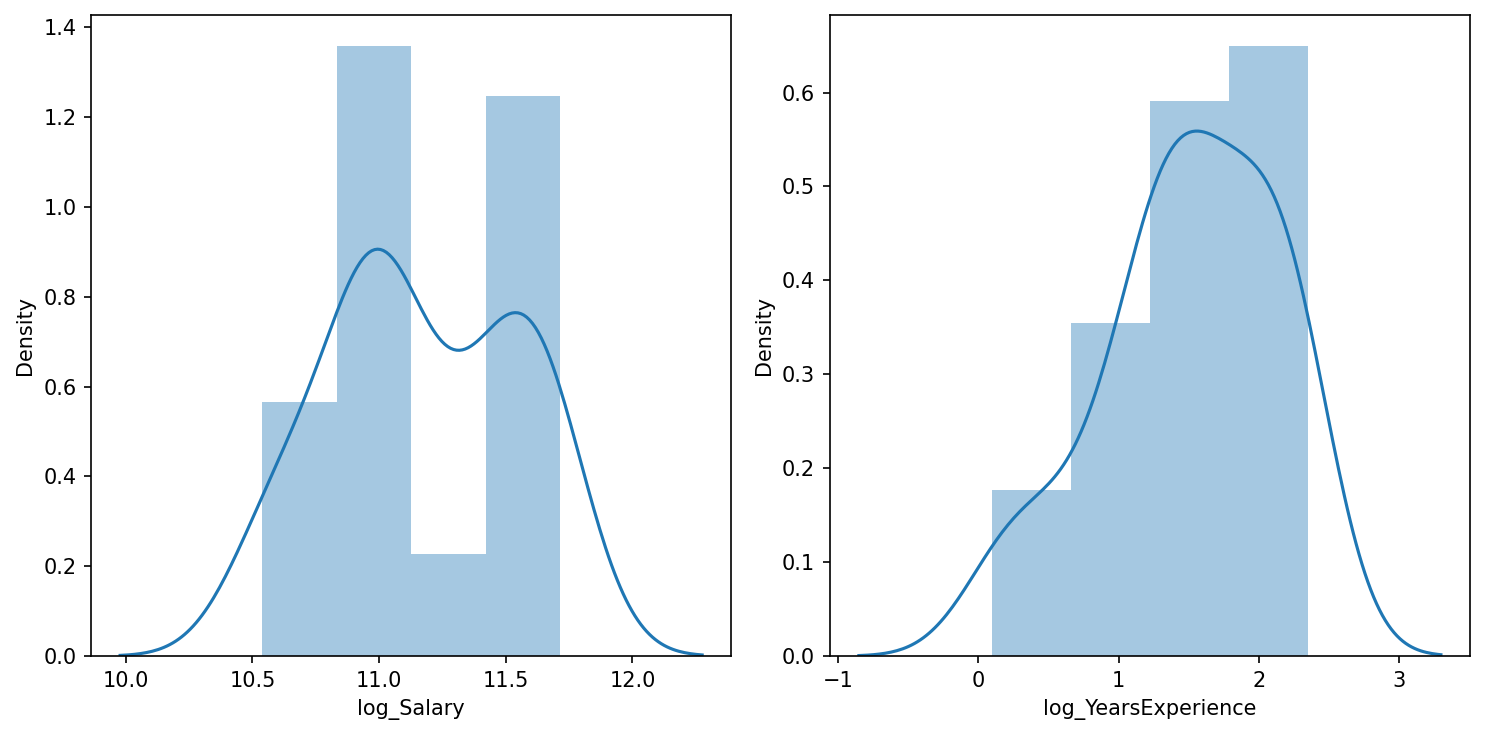

In [38]:
plt.subplot(1,2,1)
sns.distplot(df['log_Salary'])

plt.subplot(1,2,2)
sns.distplot(df['log_YearsExperience'])

plt.tight_layout()

In [39]:
log_model = smf.ols('log_Salary~log_YearsExperience',data=df).fit()
log_model

In [40]:
log_model.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [47]:
log_model.rsquared, log_model.rsquared_adj

(0.9052150725817149, 0.9018298966024904)

- sqrt transformation

In [59]:
df['sqrt_Salary'] = np.sqrt(df['Salary'])
df['sqrt_YearsExperience'] = np.sqrt(df['YearsExperience'])

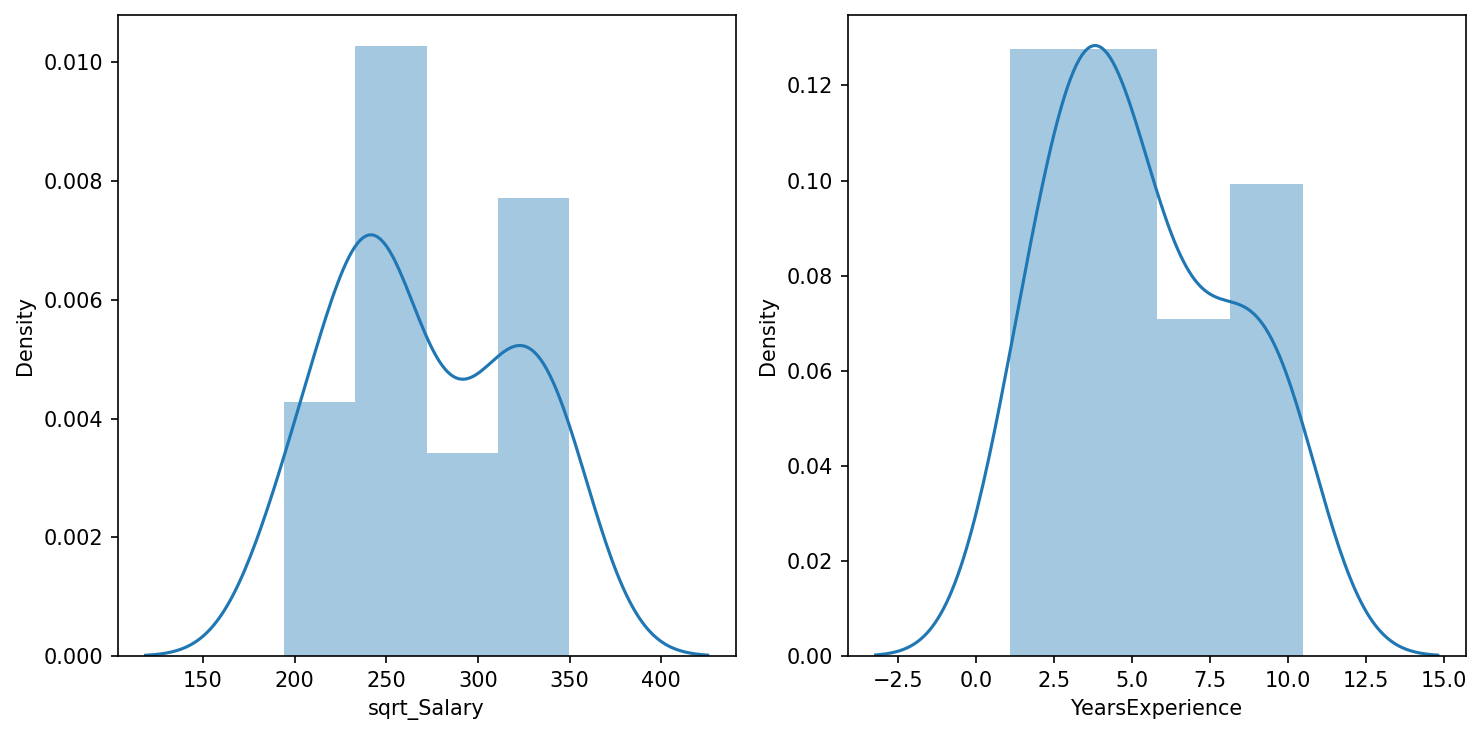

In [61]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_Salary'])

plt.subplot(1,2,2)
sns.distplot(df['YearsExperience'])

plt.tight_layout()

In [62]:
sqrt_model = smf.ols('sqrt_Salary~sqrt_YearsExperience',data=df).fit()
sqrt_model

In [63]:
sqrt_model.params

Intercept               103.568031
sqrt_YearsExperience     75.626932
dtype: float64

In [64]:
sqrt_model.rsquared, sqrt_model.rsquared_adj

(0.9419490138976825, 0.9398757643940283)

In [67]:
x = np.array(df['YearsExperience']).reshape((-1, 1))
y = df['Salary']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [68]:
lr_model.coef_, lr_model.intercept_

(array([9440.46383365]), 26040.067657420906)

In [69]:
y_hat = lr_model.predict(x_test)
y_hat

array([ 90235.22172621, 108172.10301013,  56249.55192509,  81738.80427593,
        40200.76340789, 116668.52046041])

In [70]:
mse = mean_squared_error(y_test,y_hat)
mse

4934969.878489006

In [71]:
r2_score(y_test,y_hat)

0.993422386435995